# Product Category EDA and Classification Model using a Descision Tree

## Overall Oabjective:

The main purpose of this project is to conduct a robust exploratory data analysis on a retail sales dataset that majorly focuses on the product categories and key factors that influence their purchase.
Also, the fore-developed decision tree model developed below seeks to classify which product category a customer might choose to buy based on various factors.

## Table of Contents
1. Loading the required libraries
2. Loading the dataset
3. Exploring the dataset
4. Data Wrangling
5. Exploratory Data Analysis of the data
6. Developing, Implementing and Visualizing the Descision Tree

### Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

### Loading the dataset

In [13]:
df = pd.read_csv(r"C:\Users\Alvin\Downloads\Compressed\Retail Sales Dataset\retail_sales_dataset.csv", encoding = "Latin-1")

df.head(3) ## checking the first 3 rows of the data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30


### Exploring the dataset

##### This section entails a brief investigation of the dataset i.e, the shape, datatypes, summary statistics etc.

#### Investigating the different datatypes in the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### Finding out the shape of the dataset

In [17]:
df.shape

(1000, 9)

#### Obtaining the sumamry statistics for the dataset for numeric variables

In [20]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


#### Getting more summary statistics for the dataset

In [30]:
from scipy.stats import describe

numeric = df.drop(columns = ["Date", "Customer ID", "Gender", "Product Category"]) ## dropping columns with string datatypes

description = describe(numeric) 

## designing a clear output for the results above
for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 1000
minmax : (array([ 1, 18,  1, 25, 25], dtype=int64), array([1000,   64,    4,  500, 2000], dtype=int64))
mean : [500.5    41.392   2.514 179.89  456.   ]
variance : [8.34166667e+04 1.87181518e+02 1.28308709e+00 3.59790169e+04
 3.13597347e+05]
skewness : [ 0.         -0.0487392  -0.01401479  0.73520286  1.37406319]
kurtosis : [-1.2000024  -1.20120827 -1.39190691 -1.13930349  0.80496789]


### Data Wrangling

##### This section focuses on cleaning, and transforming the dataset in order to extract clear insights during analysis and buidling the model later on. 

#### 1. Dealing with null values 

In [35]:
## counting the number of null values column wise

df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

##### There are no null values in the dataset.

#### 2. Dealing with duplicates

In [39]:
## ## counting the number of duplicated values column wise

df.duplicated().sum()

0

##### There are no duplicated values in the dataset.

#### 3. Dealing with outliers

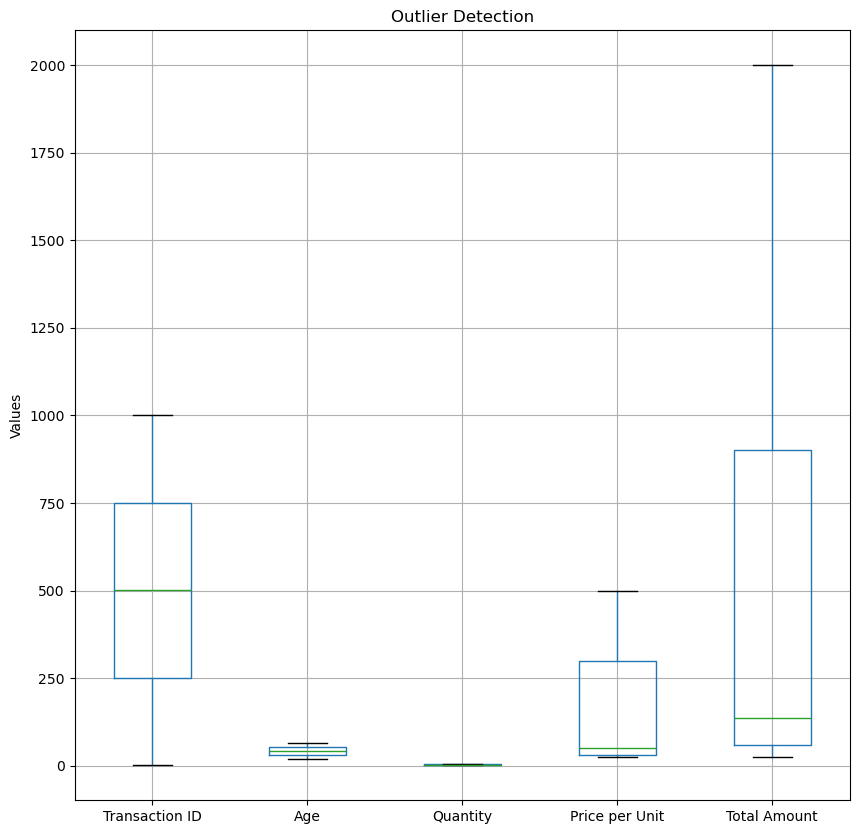

In [50]:
## plotting a figure to check for any outliers in the dataset

plt.figure(figsize=(10,10))
df.boxplot()
plt.ylabel("Values")
plt.title("Outlier Detection", loc = "center")
plt.grid(True)
plt.show()

##### The figure has no outliers.

#### 4. Dropping unnecessary columns

In [54]:
data = df.drop(["Transaction ID"],axis = 1)

data.tail(4) #checking for the bottom 4 columns for teh cleaned dataset

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
996,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


#### 5. Adding columns into the dataset

In [102]:
## Adding the year and month column to the dataset

data["Year"] = pd.DatetimeIndex(data["Date"]).year # extracting the year from the date column
data["Month"] = pd.DatetimeIndex(data["Date"]).month # extracting the month from the date column

data.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5


#### 6. Renaming values 

In [111]:
## Renaming values in the month column to words 

data["Month"] = data["Month"].replace({
    1 : "January",
    2 : "February",
    3 : "March",
    4 : "April",
    5 : "May",
    6 : "June",
    7 : "July",
    8 : "August",
    9 : "September",
    10 : "October",
    11 : "November",
    12 : "December" 
})

data.head()

,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month
0,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,Novermber
1,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,February
2,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,January
3,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,May
4,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,May


### Exploratory Data Analysis

##### This section focuses on analyzing the data to extract meaningful insights that can be used in making business decisions to improve sales volumes.

#### Finding out the total number of customers

In [60]:
total_customers = data["Customer ID"].count()
total_customers

1000

#### Finding out  the average customer age

In [63]:
data["Age"].mean()

41.392

#### Finding out the total amount of goods sold

In [66]:
data["Total Amount"].sum()

456000

#### Finding out the total price and total quantity of goods sold

In [70]:
total_quantity = data["Quantity"].sum() 
total_price = data["Price per Unit"].sum()

print("Total Price:", total_price)
print("Total Quantity:", total_quantity)

Total Price: 179890
Total Quantity: 2514


#### Finding out the various product category types

In [73]:
data["Product Category"].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

#### Finding the month that had the most amount of goods sold.

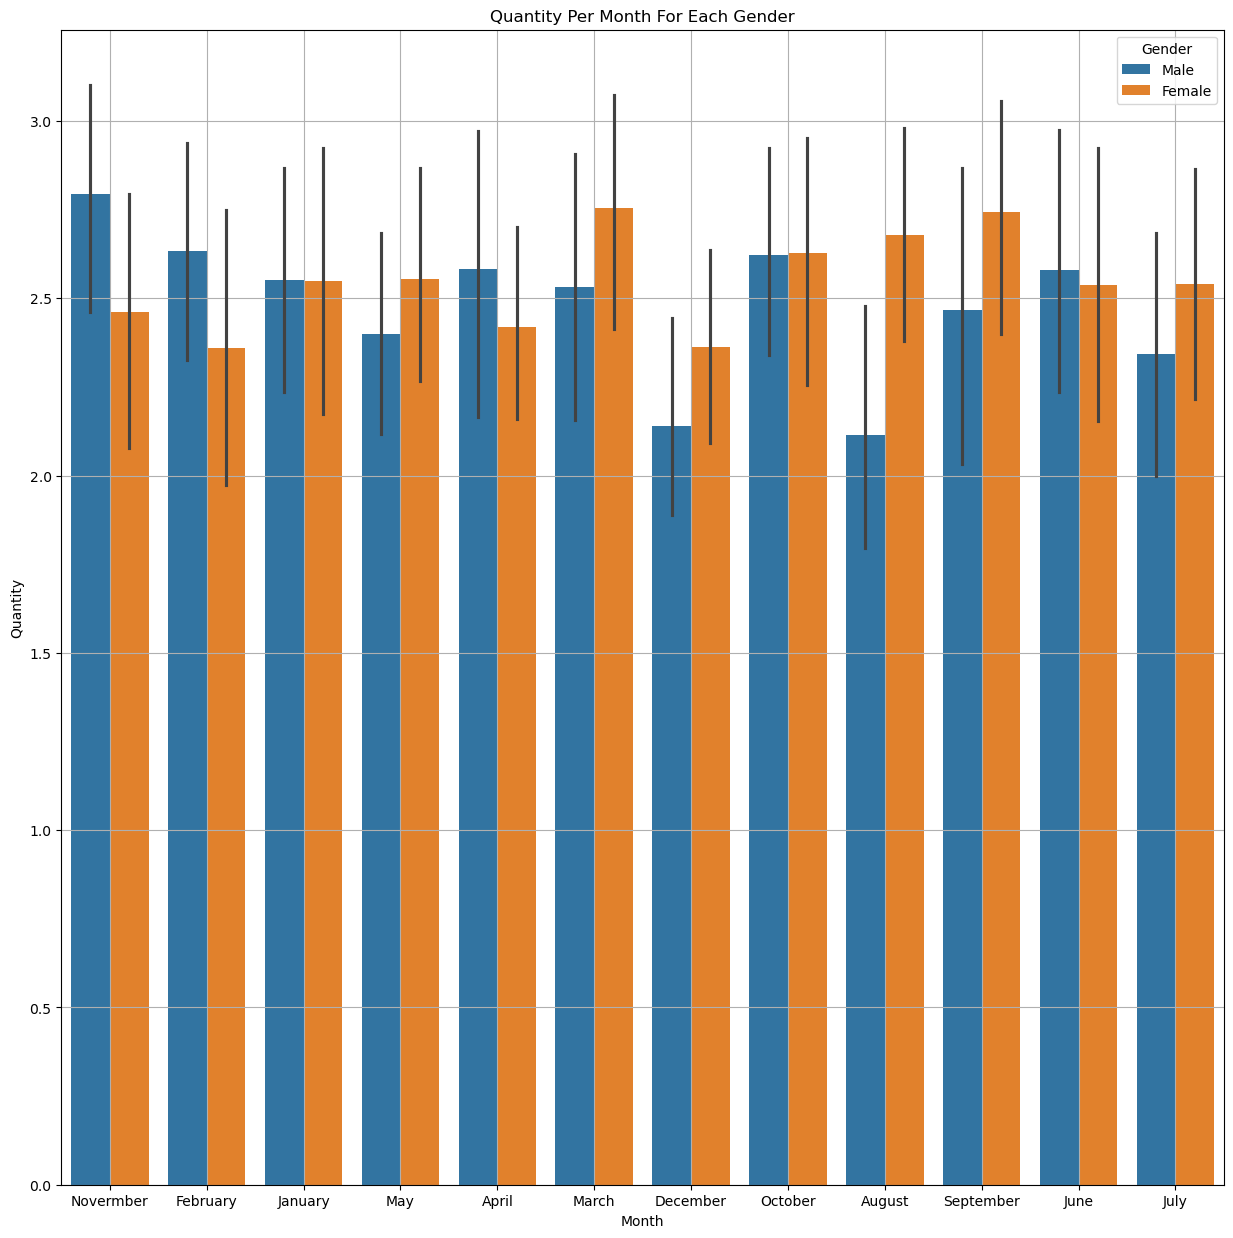

In [154]:
plt.figure(figsize = (15,15))
sns.barplot(data, x = "Month", y = "Quantity", hue = "Gender") 
plt.title("Quantity Per Month For Each Gender")
plt.grid(True)
plt.show()

##### Interpretation:
1. There were more goods purchased in the month of November from male customers.
2. There were more goods purchased in the month of March from female customers.

#### Year that had the highest quantity of goods sold

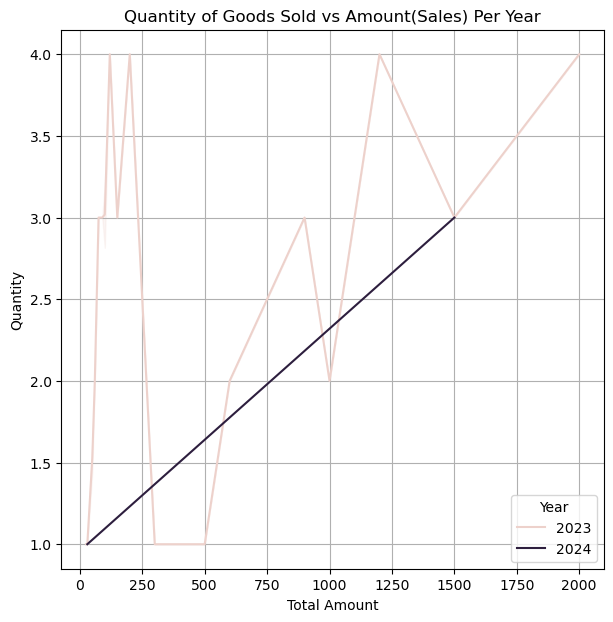

In [129]:
plt.figure(figsize = (7,7))
sns.lineplot(data = data, x = "Total Amount", y = "Quantity", hue="Year")
plt.grid(True)
plt.title("Quantity of Goods Sold vs Amount(Sales) Per Year")
plt.show()

##### Interpretation: 
1. In the year 2024, there is an upward trend, proving that there will be more goods will be sold and sales volume realized as the year progresses.
2. In the year 2023, there is a fluctuating trend that slowly starts to move in an upward trend, indicating that more good were sold positively affecting sales.

#### Visualizing the correlation between variables

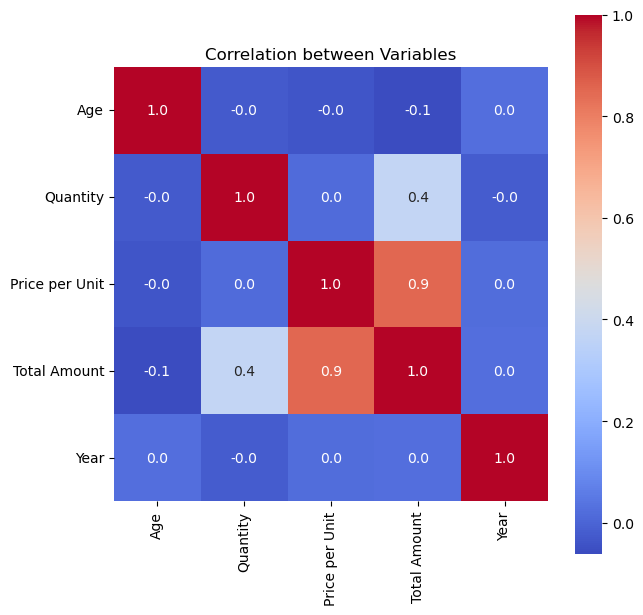

In [135]:
data_1 = data.drop(["Date", "Customer ID", "Gender", "Product Category", "Month"], axis = 1) ## dropping categorical values

correlation = data_1.corr()  ## calculating the correlation between numeric variables

plt.figure(figsize = (7,7))
sns.heatmap(correlation, annot=True, annot_kws={"size" : 10}, cbar=True, square=True, fmt = ".1f", cmap="coolwarm")
plt.title("Correlation between Variables")
plt.show()

##### Interpretations:
1. There is a strong correlation between the price per unit and total amount.
2. There is no correlation between age and the other variables.
3. There is a fairly strong correlation between the quantity and the total amount.
4. There is no relationship between the year and the other variables.

#### Finding out the gender that has the highest sales volume.

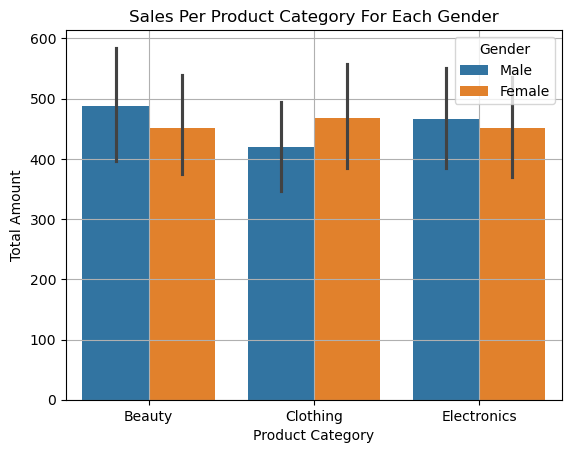

In [141]:
sns.barplot(data, y = "Total Amount", x = "Product Category", hue = "Gender", legend=True)
plt.title("Sales Per Product Category For Each Gender")
plt.grid(True)
plt.show()

##### Interpreation:
1. Except for clothing, the other product categories male customers are more interested in than female customers.
2. Beauty products are more popular than the electronics among male customers.

### Developing the Decision Tree

##### Declaration of the variables are as follows:
1. X as the independent variables (other columns expcept the product category)
2. y as the dependent variable (product category

In [170]:
## removing irrelevant columns to be used in developing the model

model_data = data.drop(["Month", "Date", "Customer ID", "Year"], axis = 1)

model_data.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


#### Defining the dependent and independent variables

In [182]:
X = model_data.drop(["Product Category"], axis = 1)
y = model_data["Product Category"]

#### Encoding the categorical values to numerical values for easy model building and implementation.

In [180]:
model_data["Gender"] = model_data["Gender"].replace({
    "Male" : 1,
    "Female" : 2
})

model_data["Product Category"] = model_data["Product Category"].replace({
    "Beauty" : 1,
    "Clothing" : 2,
    "Electronics" : 3
})

C:\Users\Alvin\AppData\Local\Temp\ipykernel_5456\2512542810.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data["Gender"] = model_data["Gender"].replace({
C:\Users\Alvin\AppData\Local\Temp\ipykernel_5456\2512542810.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  model_data["Product Category"] = model_data["Product Category"].replace({


#### Setting up the Decision Tree

#### Dividing the X and y into training and testing sets

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

#### Designing  and fitting the model

##### For this case, the decision tree classifier is used. Inside the clasfier, specify criterion="entropy" to identify the information gain of each node.

In [196]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier(criterion= "entropy", max_depth=3, max_leaf_nodes=3) ## defining the decision tree classifier

product_category_model = dtc.fit(X_train,y_train) ## fitting the model

#### Predicting the model

In [199]:
pred = product_category_model.predict(X_test)

#### Printing out the prediction tree

In [202]:
print(pred)

[2 1 2 1 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2
 2 2 2 2 1 2 1 2 1 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 2 1
 2 1 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 1
 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 2
 1 2 2 1 2 2 1 1 2 2 1 2 2 2 1 2 1 2 1 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 2 2 2
 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2]


#### Evaluating the model

In [205]:
from sklearn.metrics import accuracy_score

print("Decision Tree's Accuracy:", accuracy_score(y_test, pred))

Decision Tree's Accuracy: 0.256


#### Visualizing the Decision Tree

In [220]:
## loading the required libraries to plot the decision tree

from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

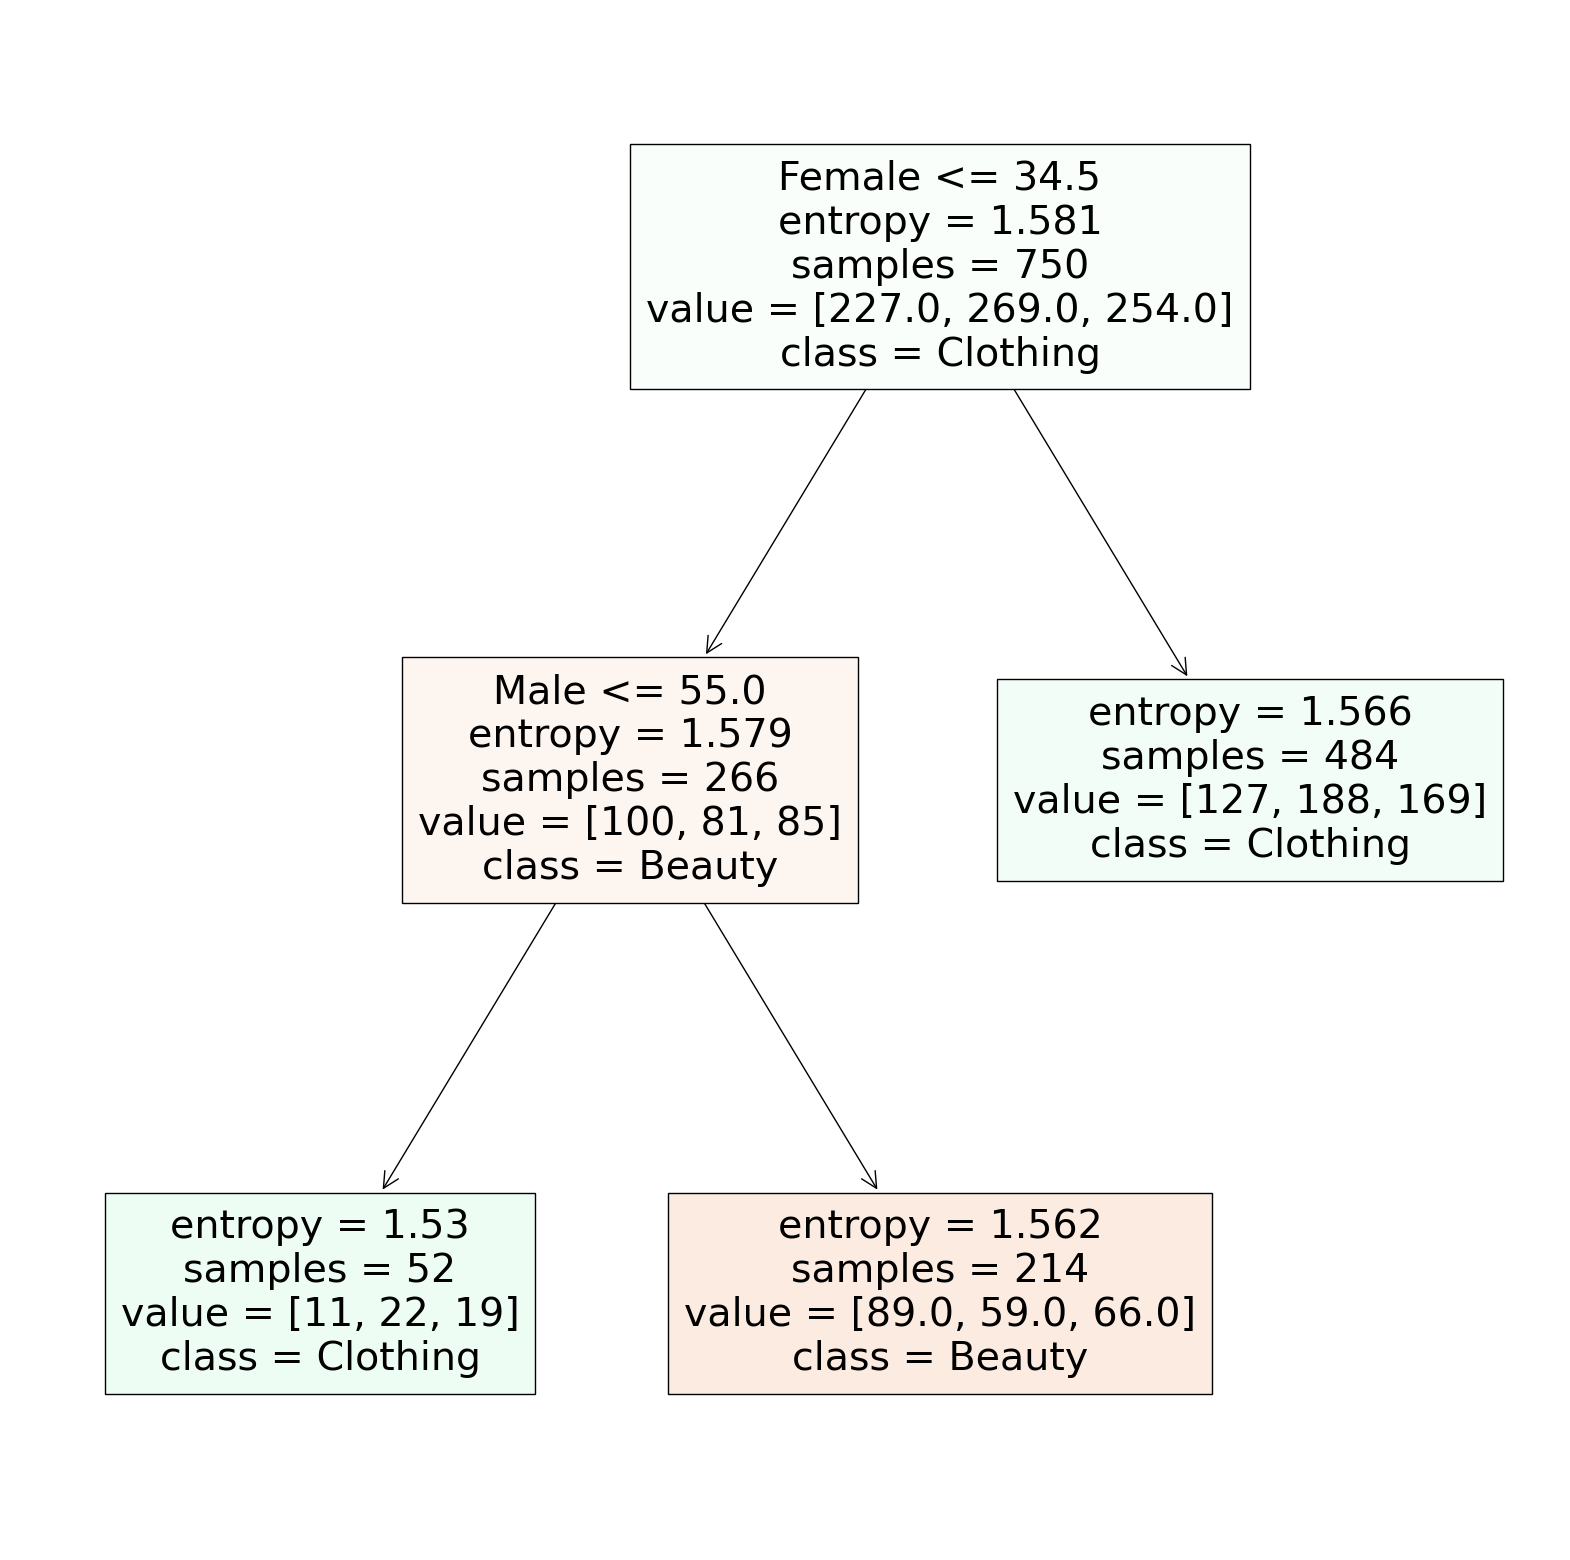

In [243]:
## visualizing the decision tree

fig =plt.figure(figsize = (20,20))
_ = tree.plot_tree(product_category_model, 
                   feature_names=data["Gender"],
                   class_names=data["Product Category"],
                   filled=True)

#### Saving into an image (.png) file

In [251]:
fig.savefig("product_category_decistion_tree.png")

### Application:

The model above can be used to classify customers walking into the store to easily boost sales revenue, based on their preference and key metrics taken into consideration